<a href="https://colab.research.google.com/github/pgpanagiotidis/Hypothesis-testing/blob/main/Paired_Samples_T_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#Generic imports we will need
import numpy as np
import pandas as pd
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
df_diet = pd.read_csv('stcp-Rdataset-Diet.csv')

In [5]:
print(df_diet.columns)

Index(['Person', 'gender', 'Age', 'Height', 'pre.weight', 'Diet',
       'weight6weeks'],
      dtype='object')


In [6]:
#create a column with the differences of the weight before and after the diet
df_diet['Diff']=df_diet['pre.weight']-df_diet['weight6weeks']
print(df_diet)

    Person gender  Age  Height  pre.weight  Diet  weight6weeks  Diff
0       25          41     171          60     2          60.0   0.0
1       26          32     174         103     2         103.0   0.0
2        1      0   22     159          58     1          54.2   3.8
3        2      0   46     192          60     1          54.0   6.0
4        3      0   55     170          64     1          63.3   0.7
..     ...    ...  ...     ...         ...   ...           ...   ...
73      74      1   35     183          83     3          80.2   2.8
74      75      1   49     177          84     3          79.9   4.1
75      76      1   28     164          85     3          79.7   5.3
76      77      1   40     167          87     3          77.8   9.2
77      78      1   51     175          88     3          81.9   6.1

[78 rows x 8 columns]


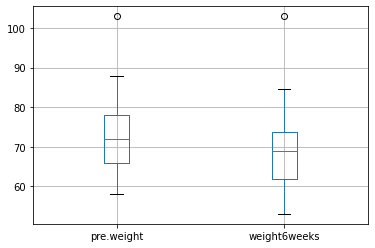

In [32]:
#boxplot for the weight before and after the diet
boxplot = df_diet.boxplot(column=["pre.weight", "weight6weeks"])

In [7]:
#some descriptive statistics for the column with the differences
df_diet['Diff'].describe()

count    78.000000
mean      3.844872
std       2.551478
min      -2.100000
25%       2.000000
50%       3.600000
75%       5.550000
max       9.200000
Name: Diff, dtype: float64

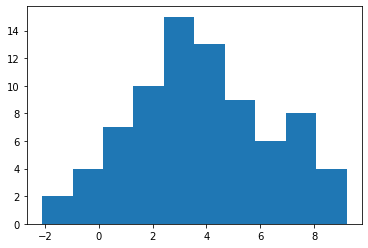

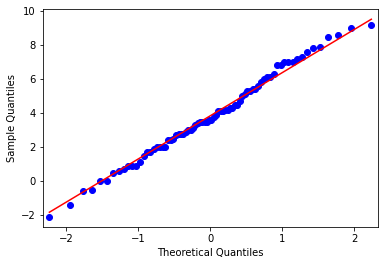

In [8]:
#checking the Normality of Data for the column with the differences
# histogram plot
pyplot.hist(df_diet['Diff'])
pyplot.show()
# q-q plot
qqplot(df_diet['Diff'], line='s')
pyplot.show()

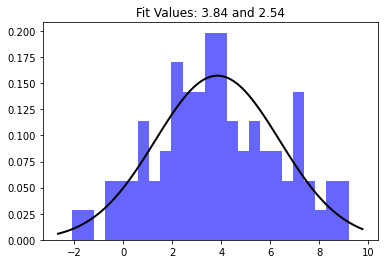

In [9]:
# Fit a normal distribution to the data for the column with the differences
# mean and standard deviation
mu, std = norm.fit(df_diet['Diff']) 
  
# Plot the histogram.
plt.hist(df_diet['Diff'], bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

There is evidence for the normality, but let's also use statistical Normality Tests.

In [10]:
#statistical Normality Tests for the data for the column with the differences
#Shapiro-Wilk Test
stat, p = shapiro(df_diet['Diff'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.990, p=0.802
Sample looks Gaussian (fail to reject H0)


Continue with a parametric test as the assumption of normality is satisfied.

In [30]:
#paired sample t-test
stats.ttest_rel(df_diet['pre.weight'], df_diet['weight6weeks'])

Ttest_relResult(statistic=13.308753851748712, pvalue=1.1722360462415227e-21)

Because the p-value of our test is smaller than alpha = 0.05, we reject the test's null hypothesis. We have sufficient evidence that the mean of weights' differences is not zero.

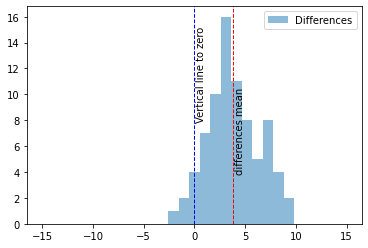

In [28]:
#plot the distribution and the median of each group
bins = np.linspace(-15, 15, 30)
pyplot.hist(df_diet['Diff'], bins, alpha=0.5, label='Differences')
plt.axvline(0, color='b', linestyle='dashed', linewidth=1)
plt.text(df_diet['Diff'].mean()+0.18,4,'differences mean',rotation=90)
plt.axvline(df_diet['Diff'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.text(0+0.18,8,'Vertical line to zero',rotation=90)
pyplot.legend(loc='upper right')
pyplot.show()

As we can identify from the plot above, the mean seems to be greater than the zero, so we could say that the diet(s) was successful.